In [1]:
from datetime import datetime
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.mpl.ticker as cticker
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
from metpy.units import units
import numpy as np
from scipy.ndimage import gaussian_filter
import xarray as xr

In [2]:
ds = xr.open_dataset('SRH_Pressure.nc')
ds

<xarray.Dataset>
Dimensions:    (longitude: 33, latitude: 29, level: 18, time: 2)
Coordinates:
  * longitude  (longitude) float32 117.0 117.2 117.5 117.8 ... 124.5 124.8 125.0
  * latitude   (latitude) float32 20.0 19.75 19.5 19.25 ... 13.5 13.25 13.0
  * level      (level) int32 400 450 500 550 600 650 ... 900 925 950 975 1000
  * time       (time) datetime64[ns] 2016-08-14T06:00:00 2016-08-14T08:00:00
Data variables:
    u          (time, level, latitude, longitude) float32 ...
    v          (time, level, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-06-13 08:09:36 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [3]:
ds1 = xr.open_dataset('SRH_Surf.nc')
ds1

<xarray.Dataset>
Dimensions:    (longitude: 33, latitude: 29, time: 2)
Coordinates:
  * longitude  (longitude) float32 117.0 117.2 117.5 117.8 ... 124.5 124.8 125.0
  * latitude   (latitude) float32 20.0 19.75 19.5 19.25 ... 13.5 13.25 13.0
  * time       (time) datetime64[ns] 2016-08-14T06:00:00 2016-08-14T08:00:00
Data variables:
    u10        (time, latitude, longitude) float32 ...
    v10        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-06-13 08:07:18 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [8]:
lats = ds['latitude']
lons = ds['longitude']

usurf = ds1['u10']
vsurf = ds1['v10']
uwind = ds['u']
vwind = ds['v']

# Compute for the 'user-defined' SRH starting with mean-winds and Storm-Relative Winds (SRW)

# Select u-component winds from surface to 500 hPa
uwnd_surf10 = gaussian_filter(usurf.data[1], sigma=1) * units('m/s')
uwnd_1000 = gaussian_filter(uwind.sel(level=1000).data[1], sigma=1) * units('m/s')
uwnd_975 = gaussian_filter(uwind.sel(level=950).data[1], sigma=1) * units('m/s')
uwnd_950 = gaussian_filter(uwind.sel(level=950).data[1], sigma=1) * units('m/s')
uwnd_925 = gaussian_filter(uwind.sel(level=925).data[1], sigma=1) * units('m/s')
uwnd_900 = gaussian_filter(uwind.sel(level=900).data[1], sigma=1) * units('m/s')
uwnd_875 = gaussian_filter(uwind.sel(level=875).data[1], sigma=1) * units('m/s')
uwnd_850 = gaussian_filter(uwind.sel(level=850).data[1], sigma=1) * units('m/s')
uwnd_825 = gaussian_filter(uwind.sel(level=825).data[1], sigma=1) * units('m/s')
uwnd_800 = gaussian_filter(uwind.sel(level=800).data[1], sigma=1) * units('m/s')
uwnd_775 = gaussian_filter(uwind.sel(level=775).data[1], sigma=1) * units('m/s')
uwnd_750 = gaussian_filter(uwind.sel(level=750).data[1], sigma=1) * units('m/s')
uwnd_700 = gaussian_filter(uwind.sel(level=700).data[1], sigma=1) * units('m/s')
uwnd_650 = gaussian_filter(uwind.sel(level=650).data[1], sigma=1) * units('m/s')
uwnd_600 = gaussian_filter(uwind.sel(level=600).data[1], sigma=1) * units('m/s')
uwnd_550 = gaussian_filter(uwind.sel(level=550).data[1], sigma=1) * units('m/s')
uwnd_500 = gaussian_filter(uwind.sel(level=500).data[1], sigma=1) * units('m/s')

# Select v-component winds from surface to 500 hPa.
vwnd_surf10 = gaussian_filter(vsurf.data[1], sigma=1) * units('m/s')
vwnd_1000 = gaussian_filter(vwind.sel(level=1000).data[1], sigma=1) * units('m/s')
vwnd_975 = gaussian_filter(vwind.sel(level=950).data[1], sigma=1) * units('m/s')
vwnd_950 = gaussian_filter(vwind.sel(level=950).data[1], sigma=1) * units('m/s')
vwnd_925 = gaussian_filter(vwind.sel(level=925).data[1], sigma=1) * units('m/s')
vwnd_900 = gaussian_filter(vwind.sel(level=900).data[1], sigma=1) * units('m/s')
vwnd_875 = gaussian_filter(vwind.sel(level=875).data[1], sigma=1) * units('m/s')
vwnd_850 = gaussian_filter(vwind.sel(level=850).data[1], sigma=1) * units('m/s')
vwnd_825 = gaussian_filter(vwind.sel(level=825).data[1], sigma=1) * units('m/s')
vwnd_800 = gaussian_filter(vwind.sel(level=800).data[1], sigma=1) * units('m/s')
vwnd_775 = gaussian_filter(vwind.sel(level=775).data[1], sigma=1) * units('m/s')
vwnd_750 = gaussian_filter(vwind.sel(level=750).data[1], sigma=1) * units('m/s')
vwnd_700 = gaussian_filter(vwind.sel(level=700).data[1], sigma=1) * units('m/s')
vwnd_650 = gaussian_filter(vwind.sel(level=650).data[1], sigma=1) * units('m/s')
vwnd_600 = gaussian_filter(vwind.sel(level=600).data[1], sigma=1) * units('m/s')
vwnd_550 = gaussian_filter(vwind.sel(level=550).data[1], sigma=1) * units('m/s')
vwnd_500 = gaussian_filter(vwind.sel(level=500).data[1], sigma=1) * units('m/s')

tot_uwind = uwnd_surf10 + uwnd_1000 + uwnd_975 + uwnd_950 + uwnd_925 + uwnd_900 + uwnd_875 + uwnd_850 + uwnd_825 + uwnd_800 + uwnd_775 + uwnd_750 + uwnd_700 + uwnd_650 + uwnd_600 + uwnd_550 + uwnd_500
mean_uwind = tot_uwind / 17 # Number of Ns/Average
mean_uwind = mean_uwind * 75 / 100

tot_vwind = vwnd_surf10 + vwnd_1000 + vwnd_975 + vwnd_950 + vwnd_925 + vwnd_900 + vwnd_875 + vwnd_850 + vwnd_825 + vwnd_800 + vwnd_775 + vwnd_750 + vwnd_700 + vwnd_650 + vwnd_600 + vwnd_550 + vwnd_500
mean_vwind = tot_vwind / 17 # Number of Ns/Average
mean_vwind = mean_vwind * 75 / 100

# Calculate U-component Storm-Relative Winds

usrw_sfc = uwnd_surf10 - mean_uwind # 10m SRW
usrw_1000 = uwnd_1000 - mean_uwind #1000 hPa SRW
usrw_975 = uwnd_975 - mean_uwind #975 hPa SRW
usrw_950 = uwnd_950 - mean_uwind #950 hPa SRW
usrw_925 = uwnd_925 - mean_uwind #925 hPa SRW
usrw_900 = uwnd_900 - mean_uwind #900 hPa SRW
usrw_875 = uwnd_875 - mean_uwind #875 hPa SRW
usrw_850 = uwnd_850 - mean_uwind #850 hPa SRW
usrw_825 = uwnd_825 - mean_uwind #825 hPa SRW
usrw_800 = uwnd_800 - mean_uwind #800 hPa SRW
usrw_775 = uwnd_775 - mean_uwind #775 hPa SRW
usrw_750 = uwnd_750 - mean_uwind #750 hPa SRW
usrw_700 = uwnd_700 - mean_uwind #700 hPa SRW

# Calculate V-component Storm-Relative Winds

vsrw_sfc = vwnd_surf10 - mean_vwind # 10m SRW
vsrw_1000 = vwnd_1000 - mean_vwind #1000 hPa SRW
vsrw_975 = vwnd_975 - mean_vwind #975 hPa SRW
vsrw_950 = vwnd_950 - mean_vwind #950 hPa SRW
vsrw_925 = vwnd_925 - mean_vwind #925 hPa SRW
vsrw_900 = vwnd_900 - mean_vwind #900 hPa SRW
vsrw_875 = vwnd_875 - mean_vwind #875 hPa SRW
vsrw_850 = vwnd_850 - mean_vwind #850 hPa SRW
vsrw_825 = vwnd_825 - mean_vwind #825 hPa SRW
vsrw_800 = vwnd_800 - mean_vwind #800 hPa SRW
vsrw_775 = vwnd_775 - mean_vwind #775 hPa SRW
vsrw_750 = vwnd_750 - mean_vwind #750 hPa SRW
vsrw_700 = vwnd_700 - mean_vwind #700 hPa SRW

# Calculate 3 km. Storm Motion

STM_uwind = usrw_sfc + usrw_1000 + usrw_975 + usrw_950 + usrw_925 + usrw_900 + usrw_875 + usrw_850 + usrw_825 + usrw_800 + usrw_775 + usrw_750 + usrw_700
ustorm_3k = STM_uwind / 13

STM_vwind = vsrw_sfc + vsrw_1000 + vsrw_975 + vsrw_950 + vsrw_925 + vsrw_900 + vsrw_875 + vsrw_850 + vsrw_825 + vsrw_800 + vsrw_775 + vsrw_750 + vsrw_700
vstorm_3k = STM_vwind / 13

#Calculate SRH as a summation of layer/term

layer_1 = vsrw_sfc * usrw_1000 - usrw_sfc * vsrw_1000
layer_2 = vsrw_1000 * usrw_975 - usrw_1000 * vsrw_975
layer_3 = vsrw_975 * usrw_950 - usrw_975 * vsrw_950
layer_4 = vsrw_950 * usrw_925 - usrw_950 * vsrw_925
layer_5 = vsrw_925 * usrw_900 - usrw_925 * vsrw_900
layer_6 = vsrw_900 * usrw_875 - usrw_900 * vsrw_875
layer_7 = vsrw_875 * usrw_850 - usrw_875 * vsrw_850
layer_8 = vsrw_850 * usrw_825 - usrw_850 * vsrw_825
layer_9 = vsrw_825 * usrw_800 - usrw_825 * vsrw_800
layer_10 = vsrw_800 * usrw_775 - usrw_800 * vsrw_775
layer_11 = vsrw_775 * usrw_750 - usrw_775 * vsrw_750
layer_12 = vsrw_750 * usrw_700 - usrw_750 * vsrw_700

SRH_1km = layer_1 + layer_2 + layer_3 + layer_4 + layer_5 + layer_6 + layer_7

SRH_3km = layer_1 + layer_2 + layer_3 + layer_4 + layer_5 + layer_6 + layer_7 + layer_8 + layer_9 + layer_10 + layer_11 + layer_12

vtime = datetime.strptime(str(ds.time.data[1].astype('datetime64[ms]')),
                          '%Y-%m-%dT%H:%M:%S.%f')

Computation of SRW (Storm-Relative Winds) is based of Professor Roland Stull's Practical Meteorology Book (Stull, 2017).

Link: https://www.eoas.ubc.ca/books/Practical_Meteorology/

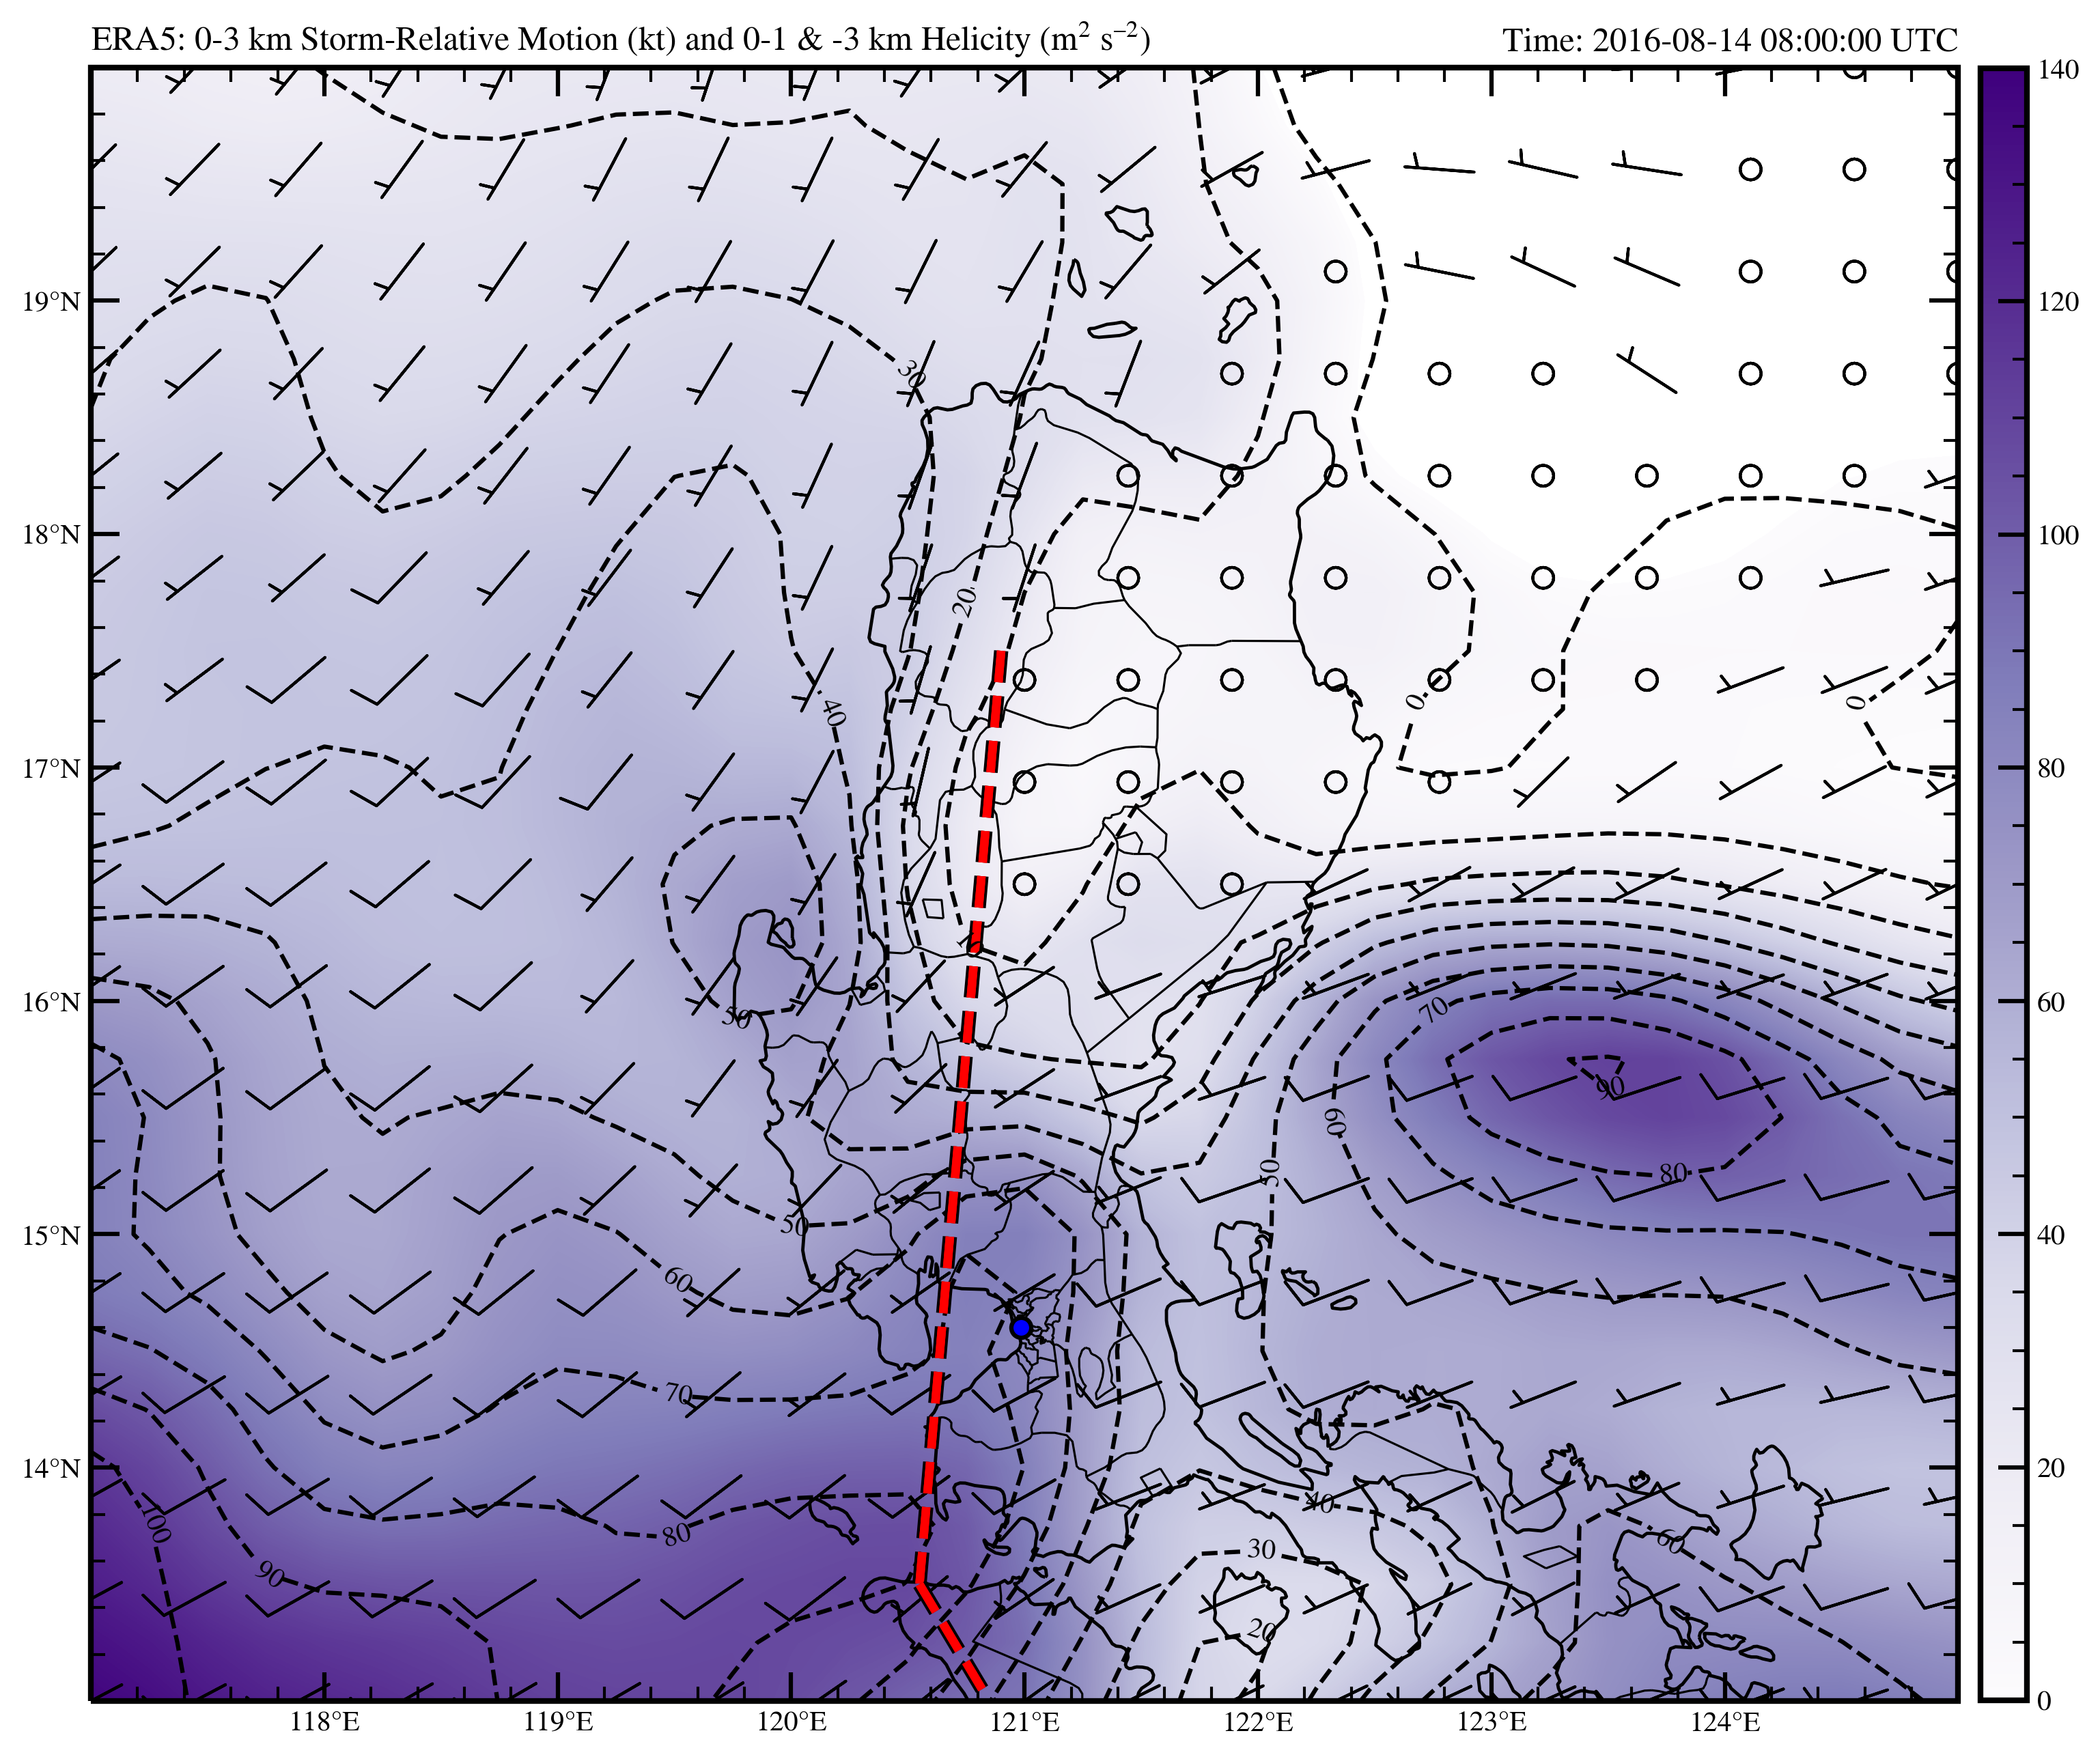

In [13]:
# Set up the projection that will be used for plotting
mapcrs = ccrs.PlateCarree()

# Set up the projection of the data; if lat/lon then PlateCarree is what you want
datacrs = ccrs.PlateCarree()

# Start the figure and create plot axes with proper projection
fig = plt.figure(1, figsize=(14, 12))
ax = plt.subplot(111, projection=datacrs)
ax.set_extent([117, 125, 13, 20], ccrs.PlateCarree())

# Add geopolitical boundaries for map reference
states_provinces = cfeature.NaturalEarthFeature(category='cultural', name='admin_1_states_provinces_lines', 
                                                scale='10m', facecolor='none', linewidth=0.75)
ax.add_feature(states_provinces, edgecolor='k')
ax.add_feature(cfeature.COASTLINE.with_scale('10m'), linewidth=1.15)
ax.add_feature(cfeature.STATES.with_scale('50m'))

# Add SRH_1km contours
sreh1_range = np.arange(0, 110, 10)
sreh1 = ax.contour(lons, lats, SRH_1km, sreh1_range, colors='k', linestyles="--", transform=datacrs)
ax.clabel(sreh1, fmt='%3g')

# Add SRH_3km contours
sreh3_range = np.arange(0, 140.1, 0.1)
sreh3 = ax.contourf(lons, lats, SRH_3km, sreh3_range, cmap='Purples', transform=datacrs)
cbar = plt.colorbar(sreh3, orientation='vertical', pad=0.01, aspect=35, shrink=0.664,
                    ticks=[0, 20, 40, 60, 80, 100, 120, 140])
cbar.ax.minorticks_on()
cbar.ax.tick_params(which='major', length=10, width=1.5, top=True, right=True, direction='in')
cbar.ax.tick_params(which='minor', length=5, width=1, top=True, right=True, direction='in')

# Add U and V-components of Storm Motion
ax.barbs(lons, lats, ustorm_3k.to('kt').m, vstorm_3k.to('kt').m, pivot='middle',
         color='black', regrid_shape=17, transform=datacrs)

# Create a line(s) that highlights the surface trough
outline=pe.withStroke(linewidth=5, foreground='k')

point1 = dict(lon=120.90, lat=17.50)
point2 = dict(lon=120.55, lat=13.50)
lon_p = [point1['lon'], point2['lon']]
lat_p = [point1['lat'], point2['lat']]
ax.plot(lon_p, lat_p, color='red', lw=3, ls='--',
        path_effects=[outline, pe.Normal()], transform=ccrs.Geodetic())

point3 = dict(lon=120.55, lat=13.50)
point4 = dict(lon=122.40, lat=10.40)
lon_p1 = [point3['lon'], point4['lon']]
lat_p1 = [point3['lat'], point4['lat']]
ax.plot(lon_p1, lat_p1, color='red', lw=3, ls='--', 
        path_effects=[outline, pe.Normal()], transform=ccrs.Geodetic())

# Make some nice titles for the plot (one right, one left)
ax.set_title('ERA5: 0-3 km Storm-Relative Motion (kt) and 0-1 & -3 km Helicity (m$^{2}$ s$^{–2}$) ', loc='left')
ax.set_title('Time: {} UTC'.format(vtime), loc='right')

# Add marker of Manila, NCR via its lats and lons
manila_lon, manila_lat = 120.9842, 14.5995
ax.plot(manila_lon, manila_lat, color='blue', markersize=7, 
        markeredgewidth=1.5, markeredgecolor='k', marker='o', transform=datacrs)

# Set X and Y-ticks for Latitude and Longitude Coordinates
ax.set_yticks(lats, 5, crs=ccrs.PlateCarree())
ax.set_xticks(lons, 5, crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
long_formatter = cticker.LongitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)
ax.xaxis.set_major_formatter(long_formatter)
ax.set_xticks(ax.get_xticks()[1:8]) #Hide end points of longitude tickmarks
ax.set_yticks(ax.get_yticks()[1:7]) #Hide end points of latitude tickmarks
ax.minorticks_on()
ax.tick_params(which='major', length=10, width=1.5, top=True, right=True, direction='in')
ax.tick_params(which='minor', length=5, width=1, top=True, right=True, direction='in')

# Adjust image and show
plt.subplots_adjust(bottom=0, top=1)
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams["mathtext.default"] = 'regular'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.savefig('STM and SRH.jpg', bbox_inches="tight")
plt.show()